# Force sensitivity of our levitated bead

Here, I try to roughly calculate the force sensitivity of our magnetic bead.

## Transverse force sensitivity (easiest case)

Assume our bead sits in its position of equilibrium, such that the force from the superconductor is equal to the force of gravity ($F_{sc} = W = mg$.). Then, in the harmonic approximation, we would say n external force would push the bead to a new equilibrium position,

$$F = kx = \omega^2 m x$$

We have seen our bead oscillate by 10ish micrometers, and we might be able to see the bead move by 500 nm; let's try to figure out the dynamic range of forces that we can therefore see with the bead we had:

$$\Delta F = \omega^2 ( \frac{\pi}{6}D^3) \rho \Delta x = (50 \text{ Hz})^2 \frac{\pi}{6} (40 \text{ um})^3 (7500 \text{ kg/m}^3) \Delta x$$

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [3]:
frequency_hz = 50.0 #@param { type: "slider", min: 2.0, max: 100, step: 1}
diameter_m = 40e-6
density_kgpm3 = 7500
g_mps2 = 9.81
min_deflection_m = 500e-9
max_deflection_m = 10e-6

min_force = frequency_hz**2 * (np.pi/6.0) * (diameter_m)**3 * (density_kgpm3) * min_deflection_m
max_force = frequency_hz**2 * (np.pi/6.0) * (diameter_m)**3 * (density_kgpm3) * max_deflection_m

print('The min force we can see in our current setup is ', min_force, ' N')
print('The max force we can see in our current setup is ', max_force, ' N')

('The min force we can see in our current setup is ', 3.1415926535897937e-13, ' N')
('The max force we can see in our current setup is ', 6.283185307179588e-12, ' N')


Alright, so it looks like the forces we can apply with the superconductor in the x direction might be sorta weak.

For reference, let's compare this to the force of gravity on the bead as a function of the radius:


Text(0,0.5,u'Force of gravity [nN]')

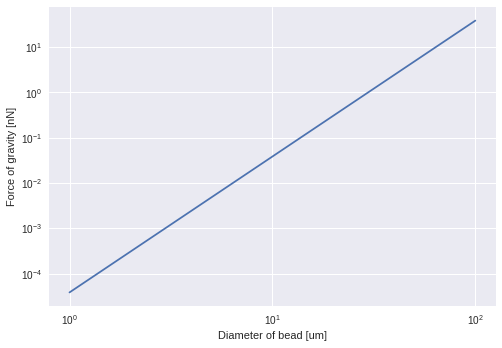

In [7]:
diameters_m = np.arange(1e-6, 100e-6, 1e-6)
force = density_kgpm3 * (np.pi/6.0) * (diameters_m**3) * g_mps2

plt.loglog(diameters_m * 1e6, force * 1e9)
plt.xlabel('Diameter of bead [um]')
plt.ylabel('Force of gravity [nN]')

## Force in the z direction

The main reference for this section is this paper: http://iopscience.iop.org.ezp-prod1.hul.harvard.edu/article/10.1143/JJAP.31.L477/pdf . Note that it might be overkill as it includes the effects of a penetration depth of the field in the superconductor.


### Assumptions:

1.   The superconductor has a penetration depth, $\lambda = 1/K$, that is larger than the thickness of the superconductor. For YBCO, a nice table to measured london penetration depths is on the Hoffman group website: http://hoffman.physics.harvard.edu/materials/ybco/ . Most of the measurements indicate that the penetration depth is at least a factor of two smaller than the thickness of films we use in our lab; this is great given the levitation force vs. penetration depth calculation (with figure) done in this paper: http://iopscience.iop.org.ezp-prod1.hul.harvard.edu/article/10.1143/JJAP.31.L938/pdf . 
2.   I neglect the fact that we have a hole in the superconductor, mostly as a simplification. If this turns out to be promising in this calculation, it might be worth doing hte full calculation.



### Model

Taking guidance from the paper and denoting the height above the superconductor as $a$, the orientation of the dipole as being parallel to the superconductor, and the penetration depth as $\lambda = 1/K$, we have that 

$$ F_{sc} = \frac{\mu_0 m^2}{8 \pi} \int_0^\infty dk \; \frac{\sqrt{K^2 +k^2} - k}{\sqrt{K^2 +k^2} + k} k^3 e^{-2 k a}$$

Let's plot this!

In [0]:
mu_0 = 1.25663706e-6
bead_diam_m = 30e-6
bead_volume_m3 = (np.pi * bead_diam_m**3)/6.0
surface_field_T = .8815 # Taken from K&J website
magnetization_Apm = (bead_diam_m/2.0)**3 * surface_field_T * 2.0 * np.pi/(mu_0) 
bead_density_kgpm3 = 7500 # from https://www.kjmagnetics.com/specs.asp
gravitational_force_on_bead_N = bead_density_kgpm3 * bead_volume_m3 * g_mps2


m_Am2 = bead_volume_m3 * magnetization_Apm
london_penetration_depth_m = 100e-9 # sort of a rough estimate based on the numbers from the Hoffman website


prefactor = mu_0 * (magnetization_Apm**2)/(8.0 * np.pi)

def integrand(k, K, a):
  return np.exp(-2.0 * a * k) * (k**3) * (np.sqrt(K**2 + k**2) - k)/((np.sqrt(K**2 + k**2) + k))


heights_m = np.linspace(10e-6,400e-6, 391, endpoint=True)
z_forces_N = prefactor * np.array([sp.integrate.quad(integrand,
                              a=0.0, b=np.inf, 
                              args=(1.0/london_penetration_depth_m, height))[0] 
            for height in heights_m])

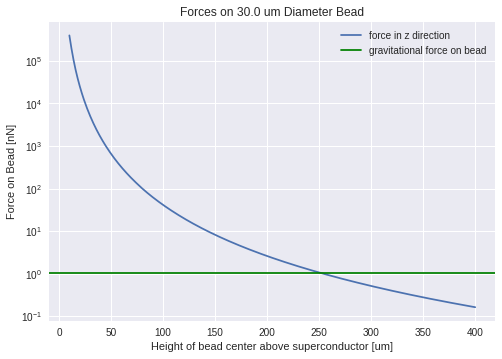

In [14]:
heights_um = heights_m * 1e6
z_forces_nN = z_forces_N * 1e9
gravitational_force_on_bead_nN = gravitational_force_on_bead_N * 1e9
plt.semilogy(heights_um, z_forces_nN, label='force in z direction')
plt.axhline(gravitational_force_on_bead_nN, label='gravitational force on bead', color='g')
plt.xlabel('Height of bead center above superconductor [um]');
plt.ylabel('Force on Bead [nN]');
plt.title('Forces on {0} um Diameter Bead'.format(bead_diam_m * 1e6))
plt.legend()

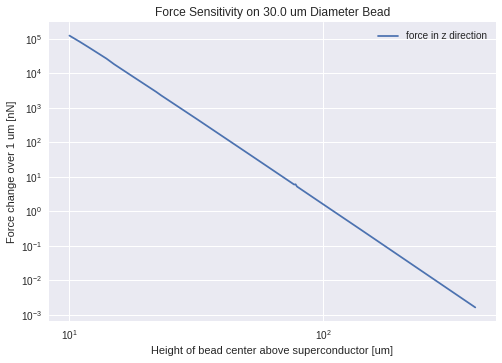

In [18]:
z_forces_diff_nN = -1 *np.diff(z_forces_nN)
plt.loglog(heights_um[0:-1], z_forces_diff_nN, label='force in z direction')
plt.xlabel('Height of bead center above superconductor [um]');
plt.ylabel('Force change over 1 um [nN]');
plt.title('Force Sensitivity on {0} um Diameter Bead'.format(bead_diam_m * 1e6))
plt.legend()